## Notebook to look at [example](https://brainchart.shinyapps.io/brainchart/) braincharts data and make plots

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### PPMI AAO stats
Calculation method
1. `PD_Diagnosis_History.csv` -->  symptom date, Dx date, visit date
    - Calculate disease duration at BL (or SC) (in months) by using visit date and Dx date (or Sx date - TBD) 
2. `Age_at_visit.csv` --> Age at vist with decimal precision
3. `AAO` = `Age at visit`  -  `disease duration`
4. `Magnetic_Resonance_Imaging__MRI_.csv` --> imaging data availability  
    - Find intersection between Visit data + imaging availability 


In [2]:
ppmi_study_data_dir = "~/projects/Parkinsons/ppmi/tabular/study_data/"

# Diagnosis History
dx_history_csv = f"{ppmi_study_data_dir}PD_Diagnosis_History.csv"
dx_history_df = pd.read_csv(dx_history_csv)

# Age at visit
age_at_visit_csv = f"{ppmi_study_data_dir}Age_at_visit.csv"
age_at_visit_df = pd.read_csv(age_at_visit_csv)

# Imaging Data
imaging_data_csv = f"{ppmi_study_data_dir}Magnetic_Resonance_Imaging__MRI_.csv"
imaging_data_df = pd.read_csv(imaging_data_csv)

# Demographics
demographics_csv = f"{ppmi_study_data_dir}Demographics.csv"
demographics_df = pd.read_csv(demographics_csv)

participant_ids = dx_history_df["PATNO"].unique()
event_ids = dx_history_df["EVENT_ID"].unique()

print(f"Number of participants with Dx history: {len(participant_ids)}")
print(f"Number of events: {event_ids}")
dx_history_df.head()

Number of participants with Dx history: 1016
Number of events: ['SC' 'BL' 'V04']


,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SXDT,PDDXDT,DXTREMOR,DXRIGID,DXBRADY,DXPOSINS,DXOTHSX,ORIG_ENTRY,LAST_UPDATE
0,274786201,3001,SC,PDFEAT,02/2011,08/2009,04/2010,1.0,1.0,1.0,0.0,0.0,02/2011,2020-06-25 16:04:32.0
1,278719301,3002,SC,PDFEAT,03/2011,02/2009,02/2010,1.0,0.0,1.0,0.0,1.0,03/2011,2020-04-01 17:33:44.0
2,281142401,3003,SC,PDFEAT,03/2011,05/2006,03/2009,0.0,1.0,1.0,1.0,1.0,03/2011,2020-06-25 16:06:25.0
3,281508301,3005,SC,PDFEAT,03/2011,08/2009,NaN,NaN,NaN,NaN,NaN,NaN,03/2011,2020-02-11 15:00:24.0
4,283723801,3006,SC,PDFEAT,03/2011,12/2009,11/2010,1.0,1.0,1.0,0.0,0.0,03/2011,2020-04-22 09:14:40.0


In [3]:
age_at_visit_df.head()

,PATNO,EVENT_ID,AGE_AT_VISIT
0,3000,BL,69.1
1,3000,R17,80.5
2,3000,SC,69.1
3,3000,V01,69.4
4,3000,V02,69.6


In [4]:
imaging_data_df.head()

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,MRICMPLT,MRIWDTI,MRIWRSS,MRIRSLT,MRIRSSDF,PDMEDDT,PDMEDTM,ORIG_ENTRY,LAST_UPDATE
0,272459801,3000,BL,MRI,02/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,02/2011,2020-06-25 16:02:19.0
1,720691201,3000,V12,MRI,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,12/2018,2020-06-25 16:02:23.0
2,278750501,3001,BL,MRI,03/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,03/2011,2020-06-25 16:04:30.0
3,281563701,3002,BL,MRI,03/2011,1.0,0.0,NaN,2.0,NaN,NaN,NaN,03/2011,2020-04-01 17:33:41.0
4,287316901,3003,BL,MRI,04/2011,1.0,0.0,NaN,1.0,NaN,NaN,NaN,04/2011,2020-06-25 16:06:23.0


In [5]:
demographics_df.head()

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,AFICBERB,ASHKJEW,BASQUE,BIRTHDT,SEX,...,HANDED,HISPLAT,RAASIAN,RABLACK,RAHAWOPI,RAINDALS,RANOS,RAWHITE,ORIG_ENTRY,LAST_UPDATE
0,cdfcd193-ccab-4656-ba84-973b004e7a35,3000,SC,SCREEN,01/2011,0.0,0.0,0.0,12/1941,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,01/2011,2021-06-01 00:00:00.0
1,beaa40cc-ccbc-4507-b8d1-883e57f3ad56,3001,SC,SCREEN,02/2011,0.0,0.0,0.0,01/1946,1,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,02/2011,2022-01-06 00:00:00.0
2,98021fd9-6f8a-4bad-b8bd-16320a15091c,3002,SC,SCREEN,03/2011,0.0,0.0,0.0,08/1943,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,03/2011,2022-01-06 00:00:00.0
3,281141501,3003,SC,SCREEN,03/2011,NaN,NaN,NaN,07/1954,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,03/2011,2020-06-25 16:06:24.0
4,281159801,3004,SC,SCREEN,03/2011,NaN,NaN,NaN,11/1951,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,03/2011,2020-06-30 09:25:16.0


### Calculate disease duration

In [6]:
Sx_date_col = "SXDT"
Dx_date_col = "PDDXDT" 
onset_date_col = Dx_date_col # TBD - need to check if this is correct
visit_date_col = "INFODT"

dx_history_df["Disease duration (months)"] = pd.to_datetime(dx_history_df[visit_date_col]).dt.to_period('M').astype(int) \
     - pd.to_datetime(dx_history_df[onset_date_col]).dt.to_period('M').astype(int)

dx_history_df = dx_history_df[dx_history_df["Disease duration (months)"] >= 0]
dx_history_df.head()

,REC_ID,PATNO,EVENT_ID,PAG_NAME,INFODT,SXDT,PDDXDT,DXTREMOR,DXRIGID,DXBRADY,DXPOSINS,DXOTHSX,ORIG_ENTRY,LAST_UPDATE,Disease duration (months)
0,274786201,3001,SC,PDFEAT,02/2011,08/2009,04/2010,1.0,1.0,1.0,0.0,0.0,02/2011,2020-06-25 16:04:32.0,10
1,278719301,3002,SC,PDFEAT,03/2011,02/2009,02/2010,1.0,0.0,1.0,0.0,1.0,03/2011,2020-04-01 17:33:44.0,13
2,281142401,3003,SC,PDFEAT,03/2011,05/2006,03/2009,0.0,1.0,1.0,1.0,1.0,03/2011,2020-06-25 16:06:25.0,24
4,283723801,3006,SC,PDFEAT,03/2011,12/2009,11/2010,1.0,1.0,1.0,0.0,0.0,03/2011,2020-04-22 09:14:40.0,4
5,294409901,3007,SC,PDFEAT,04/2011,09/2010,01/2011,1.0,1.0,1.0,0.0,1.0,06/2011,2020-01-02 12:40:55.0,3


### Calculate AAO

In [7]:
ppmi_AAO_df = dx_history_df[["PATNO", "EVENT_ID", "Disease duration (months)"]]
age_at_visit_df = age_at_visit_df[age_at_visit_df["EVENT_ID"].isin(["BL","SC"])].copy()
age_at_visit_df["AGE_AT_VISIT (months)"] = age_at_visit_df["AGE_AT_VISIT"] * 12.0

ppmi_AAO_df = pd.merge(ppmi_AAO_df, age_at_visit_df, on=["PATNO", "EVENT_ID"], how="inner")
ppmi_AAO_df["AAO"] = (ppmi_AAO_df["AGE_AT_VISIT (months)"] - ppmi_AAO_df["Disease duration (months)"]) / 12.0
n_AAO_patients = len(ppmi_AAO_df["PATNO"].unique())
print(f"Number of patients with AAO: {n_AAO_patients}")
ppmi_AAO_df.head()

Number of patients with AAO: 935


,PATNO,EVENT_ID,Disease duration (months),AGE_AT_VISIT,AGE_AT_VISIT (months),AAO
0,3001,SC,10,65.1,781.2,64.266667
1,3002,SC,13,67.6,811.2,66.516667
2,3003,SC,24,56.6,679.2,54.600000
3,3006,SC,4,57.4,688.8,57.066667
4,3007,SC,3,64.5,774.0,64.250000


### Caclulate AAO for available imaging data

In [8]:
imaging_participants = imaging_data_df[imaging_data_df["EVENT_ID"].isin(["BL","SC"])]["PATNO"].unique()
n_imaging_participants = len(imaging_participants)
print(f"Number of participants with imaging data: {n_imaging_participants}")

ppmi_AAO_df = ppmi_AAO_df[ppmi_AAO_df["PATNO"].isin(imaging_participants)]
n_AAO_patients = len(ppmi_AAO_df["PATNO"].unique())
print(f"Number of patients with AAO and imaging data: {n_AAO_patients}")

## Add "sex" info
demographics_df = demographics_df[demographics_df["EVENT_ID"].isin(["BL","SC"])][["PATNO","EVENT_ID","SEX"]].copy()
ppmi_AAO_df = pd.merge(ppmi_AAO_df, demographics_df, on=["PATNO", "EVENT_ID"], how="left")

AAO_bins = [0,50,65,100]
ppmi_AAO_df["AAO_category"] = pd.cut(ppmi_AAO_df["AAO"], bins=AAO_bins, include_lowest=True)
ppmi_AAO_df["AAO_category"] = ppmi_AAO_df["AAO_category"].astype(str)
ppmi_AAO_df["Sex"] = ppmi_AAO_df["SEX"].replace({0.0:"Male",1.0:"Female"})
ppmi_AAO_df["dataset"] = "PPMI"
ppmi_AAO_df.groupby(["SEX","AAO_category"]).count()

Number of participants with imaging data: 1638
Number of patients with AAO and imaging data: 810


PATNO  EVENT_ID  Disease duration (months)  AGE_AT_VISIT  \
SEX AAO_category                                                               
0.0 (-0.001, 50.0]     56        56                         56            56   
    (50.0, 65.0]      147       147                        147           147   
    (65.0, 100.0]     110       110                        110           110   
1.0 (-0.001, 50.0]     76        76                         76            76   
    (50.0, 65.0]      223       223                        223           223   
    (65.0, 100.0]     197       197                        197           197   

                    AGE_AT_VISIT (months)  AAO  Sex  dataset  
SEX AAO_category                                              
0.0 (-0.001, 50.0]                     56   56   56       56  
    (50.0, 65.0]                      147  147  147      147  
    (65.0, 100.0]                     110  110  110      110  
1.0 (-0.001, 50.0]                     76   76   76       76  
    (50.0, 65.0]                      223  223  223      223  
    (65.0, 100.0]                     197  197  197      197

### Plot AAO distribution

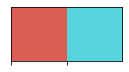

In [9]:
pal = sns.color_palette("hls", 2)

sns.palplot(pal)

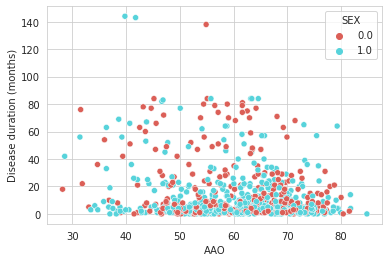

In [10]:
plot_df = ppmi_AAO_df.copy()
with sns.axes_style("whitegrid"):
    g = sns.scatterplot(x="AAO", y="Disease duration (months)", hue="SEX", data=plot_df, palette=pal)

/home/nikhil/anaconda3/envs/green_compute/lib/python3.7/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


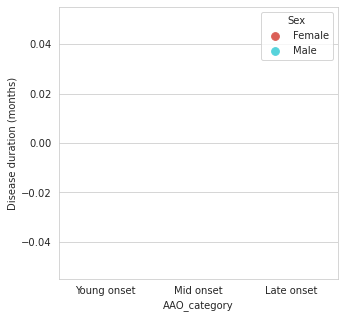

In [11]:
plot_df = ppmi_AAO_df.copy()
plot_df["AAO_category"] = plot_df["AAO_category"].replace({"(-0.001, 45.0]":"Young onset", "(45.0, 60.0]":"Mid onset", "(60.0, 100.0]":"Late onset"})
x_order = ["Young onset", "Mid onset", "Late onset"]

with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(5, 5))
    g = sns.stripplot(x="AAO_category", y="Disease duration (months)", hue="Sex", order=x_order, 
     data=plot_df, palette=pal,alpha=0.75, dodge=True, size=7, ax=ax)

### NIMHANS data

In [12]:
study_data_dir = "/home/nikhil/projects/Parkinsons/nimhans/data/PD_YLO/tabular/assessments/" 
redcap_df = pd.read_csv(f"{study_data_dir}tmp_redcap_df.csv")
redcap_df.head()

,record_id,redcap_event_name,age_assessment,gender,state_domicile,education,total_duration,aao_first_mtr,type_first_mtr,current_mtr___1,...,esaps1_minor_scor,esaps_del_scor,esaps_13,pdss_score,ess_score,rbdsq_score,rls_score,stp_bng_score,gids_total,kpps_total
0,YLOPD_01,Intake,51.0,Male,West Bengal,High school,5.0,46.0,Bradykinesia,Checked,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YLOPD_02,Intake,66.0,Male,Karnataka,Graduate,6.0,60.0,Bradykinesia,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0
2,YLOPD_03,Intake,65.0,Male,Karnataka,Primary school,9.0,56.0,Tremor,Checked,...,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,4.0
3,YLOPD_03,Follow up 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,104.0,1.0,2.0,0.0,2.0,3.0,3.0
4,YLOPD_04,Intake,59.0,Male,Karnataka,High school,22.0,37.0,Rigidity,Unchecked,...,Mild: Subject experiences some minor hallucina...,NaN,None,73.0,12.0,5.0,0.0,4.0,NaN,41.0


In [13]:
redcap_df.columns

Index(['record_id', 'redcap_event_name', 'age_assessment', 'gender',
       'state_domicile', 'education', 'total_duration', 'aao_first_mtr',
       'type_first_mtr', 'current_mtr___1', 'current_mtr___2',
       'current_mtr___3', 'current_mtr___4', 'current_mtr___5',
       'current_mtr___6', 'current_mtr___7', 'current_mtr___8',
       'current_mtr___9', 'trt_lcd_led', 'trt_ldcr_led', 'trt_led_da',
       'trt_maobi_led', 'trt_thp', 'trt_tled', 'insit_score',
       'updrs_p1_tot_sc', 'updrs_p2_tot_sc', 'updrs_p3_off_total',
       'updrs_p3_on_total', 'updrs_p3_hy', 'udysrs_total_scr', 'nms_total',
       'scopa_ps_tot', 'totalscore', 'ace_score', 'scopa_pc_total',
       'quip_tot_icd', 'quip_tot', 'hads_a_total', 'hads_d_total',
       'esaps_maj_scor', 'esaps1_minor_scor', 'esaps_del_scor', 'esaps_13',
       'pdss_score', 'ess_score', 'rbdsq_score', 'rls_score', 'stp_bng_score',
       'gids_total', 'kpps_total'],
      dtype='object')

In [26]:
useful_cols = {"record_id":"PATNO","age_assessment":"AGE_AT_VISIT",
                "gender":"Sex","aao_first_mtr":"AAO","total_duration":"Disease duration"}

nimhans_AAO_df = redcap_df[redcap_df["redcap_event_name"]=="Intake"][useful_cols.keys()].copy()
nimhans_AAO_df = nimhans_AAO_df.rename(columns=useful_cols)

n_nimhans_participants = len(nimhans_AAO_df["PATNO"].unique())
print(f"Number of participants: {n_nimhans_participants}")


nimhans_AAO_df["Dx"] = nimhans_AAO_df["PATNO"].str.split("_", expand=True)[1]
n_controls = len(nimhans_AAO_df[nimhans_AAO_df["Dx"]=="HC"])
print(f"n_controls: {n_controls}")
nimhans_AAO_df = nimhans_AAO_df[nimhans_AAO_df["Dx"]!="HC"]
nimhans_AAO_df["AGE_AT_VISIT (months)"] = nimhans_AAO_df["AGE_AT_VISIT"] * 12.0
nimhans_AAO_df["Disease duration (months)"] = nimhans_AAO_df["Disease duration"] * 12.0
nimhans_AAO_df["AAO_category"] = pd.cut(nimhans_AAO_df["AAO"], bins=AAO_bins, include_lowest=True)
nimhans_AAO_df["AAO_category"] = nimhans_AAO_df["AAO_category"].astype(str)
nimhans_AAO_df["dataset"] = "NIMHANS"

n_nimhans_patients = len(nimhans_AAO_df["PATNO"].unique())
print(f"Number of patients: {n_nimhans_patients}")

nimhans_AAO_df.head()

Number of participants: 272
n_controls: 45
Number of patients: 227


,PATNO,AGE_AT_VISIT,Sex,AAO,Disease duration,Dx,AGE_AT_VISIT (months),Disease duration (months),AAO_category,dataset
0,YLOPD_01,51.0,Male,46.0,5.0,01,612.0,60.0,"(-0.001, 50.0]",NIMHANS
1,YLOPD_02,66.0,Male,60.0,6.0,02,792.0,72.0,"(50.0, 65.0]",NIMHANS
2,YLOPD_03,65.0,Male,56.0,9.0,03,780.0,108.0,"(50.0, 65.0]",NIMHANS
4,YLOPD_04,59.0,Male,37.0,22.0,04,708.0,264.0,"(-0.001, 50.0]",NIMHANS
6,YLOPD_05,43.0,Female,37.0,6.0,05,516.0,72.0,"(-0.001, 50.0]",NIMHANS


In [15]:
nimhans_AAO_df.groupby(["Sex","AAO_category"]).count()

PATNO  AGE_AT_VISIT  AAO  Disease duration  Dx  \
Sex    AAO_category                                                     
Female (-0.001, 50.0]     41            41   41                41  41   
       (50.0, 65.0]       15            15   15                15  15   
       (65.0, 100.0]       2             2    2                 2   2   
Male   (-0.001, 50.0]     75            75   75                75  75   
       (50.0, 65.0]       64            64   64                63  64   
       (65.0, 100.0]       7             7    7                 7   7   

                       AGE_AT_VISIT (months)  Disease duration (months)  \
Sex    AAO_category                                                       
Female (-0.001, 50.0]                     41                         41   
       (50.0, 65.0]                       15                         15   
       (65.0, 100.0]                       2                          2   
Male   (-0.001, 50.0]                     75                         75   
       (50.0, 65.0]                       64                         63   
       (65.0, 100.0]                       7                          7   

                       dataset  
Sex    AAO_category             
Female (-0.001, 50.0]       41  
       (50.0, 65.0]         15  
       (65.0, 100.0]         2  
Male   (-0.001, 50.0]       75  
       (50.0, 65.0]         64  
       (65.0, 100.0]         7

In [32]:
227 - (41 + 15 + 2 + (10) + 75 + 64 + 7 + (13))

0

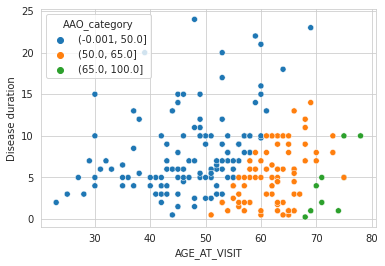

In [16]:
with sns.axes_style("whitegrid"):
    g = sns.scatterplot(x="AGE_AT_VISIT", y="Disease duration", hue="AAO_category",data=nimhans_AAO_df)

### Merge PPMI and NIMHANS data

In [17]:
AAO_df = pd.concat([ppmi_AAO_df, nimhans_AAO_df], axis=0)
AAO_df.head()

,PATNO,EVENT_ID,Disease duration (months),AGE_AT_VISIT,AGE_AT_VISIT (months),AAO,SEX,AAO_category,Sex,dataset,Disease duration,Dx
0,3001,SC,10.0,65.1,781.2,64.266667,1.0,"(50.0, 65.0]",Female,PPMI,NaN,NaN
1,3002,SC,13.0,67.6,811.2,66.516667,0.0,"(65.0, 100.0]",Male,PPMI,NaN,NaN
2,3003,SC,24.0,56.6,679.2,54.600000,0.0,"(50.0, 65.0]",Male,PPMI,NaN,NaN
3,3006,SC,4.0,57.4,688.8,57.066667,0.0,"(50.0, 65.0]",Male,PPMI,NaN,NaN
4,3007,SC,3.0,64.5,774.0,64.250000,1.0,"(50.0, 65.0]",Female,PPMI,NaN,NaN


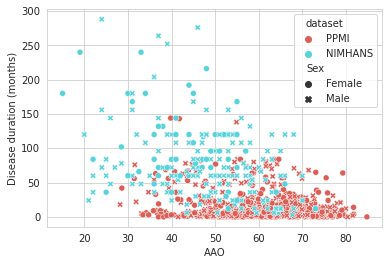

In [18]:
plot_df = AAO_df.copy()

with sns.axes_style("whitegrid"):
    g = sns.scatterplot(x="AAO", y="Disease duration (months)", hue="dataset", style="Sex", data=plot_df, palette=pal)

/home/nikhil/anaconda3/envs/green_compute/lib/python3.7/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/nikhil/anaconda3/envs/green_compute/lib/python3.7/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/home/nikhil/anaconda3/envs/green_compute/lib/python3.7/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


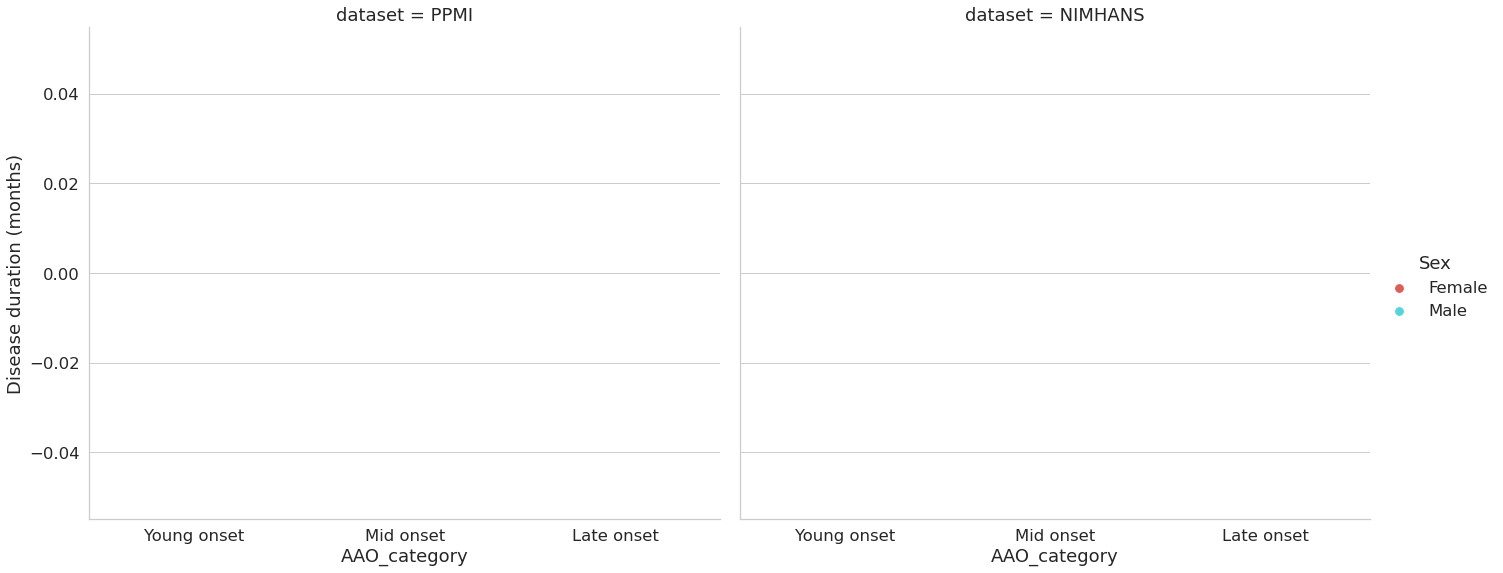

In [19]:
plot_df = AAO_df.copy().reset_index()
# plot_df = plot_df[plot_df["dataset"]=="NIMHANS"]
plot_df["AAO_category"] = plot_df["AAO_category"].replace({"(-0.001, 45.0]":"Young onset", "(45.0, 60.0]":"Mid onset", "(60.0, 100.0]":"Late onset"})
x_order = ["Young onset", "Mid onset", "Late onset"]

# with sns.axes_style("whitegrid"):
#     fig, ax = plt.subplots(figsize=(5, 5))
#     g = sns.stripplot(x="AAO_category", y="Disease duration (months)", hue="Sex", order=x_order, 
#      data=plot_df, palette=pal,alpha=0.75, dodge=True, size=7, ax=ax)

sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.catplot(x="AAO_category", y="Disease duration (months)", hue="Sex", col="dataset", order=x_order, 
     data=plot_df, palette=pal, kind="strip", alpha=0.75, dodge=True, size=8, aspect=1.2)

### QPN

In [49]:
qpn_study_data_dir = "/home/nikhil/projects/Parkinsons/qpn/releases/Apr_2023/tabular/"

bagel_file = f"{qpn_study_data_dir}bagel.tsv"

bagel_df = pd.read_csv(bagel_file, sep="\t")
bagel_df.head()


,Unnamed: 0,participant_id,session_id,bids_id,age,sex,dob,group,moca_total,updrs_1_total,updrs_2_total,updrs_3_total,updrs_4_total,moca_total_status,updrs_1_total_status,updrs_2_total_status,updrs_3_total_status,updrs_4_total_status
0,0,MNI0056,1,sub-MNI0056,79.2,M,1942-05-21,PD,21.0,12.0,22.0,58.0,0.0,True,True,True,True,True
1,1,MNI0058,1,sub-MNI0058,57.4,M,1964-03-14,PD,24.0,0.0,6.0,26.0,0.0,True,True,True,True,True
2,2,MNI0068,1,sub-MNI0068,69.1,M,1952-08-05,PD,NaN,11.0,8.0,28.0,0.0,False,True,True,True,True
3,3,MNI0079,1,sub-MNI0079,50.1,F,1971-11-25,PD,26.0,13.0,10.0,22.0,8.0,True,True,True,True,True
4,4,MNI0103,1,sub-MNI0103,82.0,M,1939-08-17,PD,20.0,28.0,25.0,43.0,NaN,True,True,True,True,False


### Approx AAO counts (done using Age at the moment)

In [50]:
bagel_df = bagel_df[bagel_df["group"] == "PD"].copy()
bagel_df["AAO_category"] = pd.cut(bagel_df["age"], bins=AAO_bins, include_lowest=True)
bagel_df["AAO_category"] = bagel_df["AAO_category"].astype(str)
bagel_df["dataset"] = "QPN"
bagel_df.head()

,Unnamed: 0,participant_id,session_id,bids_id,age,sex,dob,group,moca_total,updrs_1_total,updrs_2_total,updrs_3_total,updrs_4_total,moca_total_status,updrs_1_total_status,updrs_2_total_status,updrs_3_total_status,updrs_4_total_status,AAO_category,dataset
0,0,MNI0056,1,sub-MNI0056,79.2,M,1942-05-21,PD,21.0,12.0,22.0,58.0,0.0,True,True,True,True,True,"(65.0, 100.0]",QPN
1,1,MNI0058,1,sub-MNI0058,57.4,M,1964-03-14,PD,24.0,0.0,6.0,26.0,0.0,True,True,True,True,True,"(50.0, 65.0]",QPN
2,2,MNI0068,1,sub-MNI0068,69.1,M,1952-08-05,PD,NaN,11.0,8.0,28.0,0.0,False,True,True,True,True,"(65.0, 100.0]",QPN
3,3,MNI0079,1,sub-MNI0079,50.1,F,1971-11-25,PD,26.0,13.0,10.0,22.0,8.0,True,True,True,True,True,"(50.0, 65.0]",QPN
4,4,MNI0103,1,sub-MNI0103,82.0,M,1939-08-17,PD,20.0,28.0,25.0,43.0,NaN,True,True,True,True,False,"(65.0, 100.0]",QPN


In [51]:
bagel_df.groupby(["sex","group","AAO_category"]).count()

Unnamed: 0  participant_id  session_id  bids_id  \
sex group AAO_category                                                      
F   PD    (-0.001, 50.0]           3               3           3        3   
          (50.0, 65.0]            30              30          30       30   
          (65.0, 100.0]           24              24          24       24   
M   PD    (-0.001, 50.0]           7               7           7        6   
          (50.0, 65.0]            49              49          49       49   
          (65.0, 100.0]           53              53          53       52   

                          age  dob  moca_total  updrs_1_total  updrs_2_total  \
sex group AAO_category                                                         
F   PD    (-0.001, 50.0]    3    3           2              2              2   
          (50.0, 65.0]     30   30          23             14             14   
          (65.0, 100.0]    24   24          17             11             11   
M   PD    (-0.001, 50.0]    7    7           4              5              5   
          (50.0, 65.0]     49   49          37             31             31   
          (65.0, 100.0]    53   53          39             27             27   

                          updrs_3_total  updrs_4_total  moca_total_status  \
sex group AAO_category                                                      
F   PD    (-0.001, 50.0]              2              1                  3   
          (50.0, 65.0]               15             15                 30   
          (65.0, 100.0]              11             11                 24   
M   PD    (-0.001, 50.0]              5              5                  7   
          (50.0, 65.0]               33             31                 49   
          (65.0, 100.0]              27             26                 53   

                          updrs_1_total_status  updrs_2_total_status  \
sex group AAO_category                                                 
F   PD    (-0.001, 50.0]                     3                     3   
          (50.0, 65.0]                      30                    30   
          (65.0, 100.0]                     24                    24   
M   PD    (-0.001, 50.0]                     7                     7   
          (50.0, 65.0]                      49                    49   
          (65.0, 100.0]                     53                    53   

                          updrs_3_total_status  updrs_4_total_status  dataset  
sex group AAO_category                                                         
F   PD    (-0.001, 50.0]                     3                     3        3  
          (50.0, 65.0]                      30                    30       30  
          (65.0, 100.0]                     24                    24       24  
M   PD    (-0.001, 50.0]                     7                     7        7  
          (50.0, 65.0]                      49                    49       49  
          (65.0, 100.0]                     53                    53       53

In [54]:
3 + 30 + 24 + 7 + 49 + 53 + (3 + 3 + 3 + 3 + 3 + 3)

184

### AAO and disese duration 

- Age and AAO are highly correlated 
- Disease duration is not correlated with Age and AAO
- dd = Age - AAO


In [39]:
import scipy.stats
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

n_samples = 1000
age_scale_list = range(1,10,2)
dd_scale_list = range(1,10,2)

corr_df = pd.DataFrame(columns=["age_scale","dd_scale","r_age_dd","r_age_AAO","r_AAO_dd"])
r_age_AAO_df = pd.DataFrame(index=age_scale_list, columns=dd_scale_list)
r_AAO_dd_df = pd.DataFrame(index=age_scale_list, columns=dd_scale_list)
ix = 0
for age_scale in age_scale_list:
    for dd_scale in dd_scale_list:
        age = np.random.normal(loc=70, scale=age_scale, size=n_samples)
        dd = np.random.normal(loc=6, scale=dd_scale, size=n_samples)
        AAO = age - dd
        
        r_age_dd = scipy.stats.pearsonr(age, dd)[0]
        r_age_AAO = scipy.stats.pearsonr(age, AAO)[0]
        r_AAO_dd = scipy.stats.pearsonr(AAO, dd)[0]

        corr_df.loc[ix] = [age_scale, dd_scale, r_age_dd, r_age_AAO, r_AAO_dd]
        r_age_AAO_df.loc[age_scale, dd_scale] = r_age_AAO
        r_AAO_dd_df.loc[age_scale, dd_scale] = r_AAO_dd
        
        ix += 1

corr_df.head()

,age_scale,dd_scale,r_age_dd,r_age_AAO,r_AAO_dd
0,1.0,1.0,-0.007731,0.701721,-0.717856
1,1.0,3.0,0.031465,0.302295,-0.943231
2,1.0,5.0,0.002508,0.191408,-0.981028
3,1.0,7.0,-0.016641,0.165776,-0.988786
4,1.0,9.0,-0.009875,0.116422,-0.994301


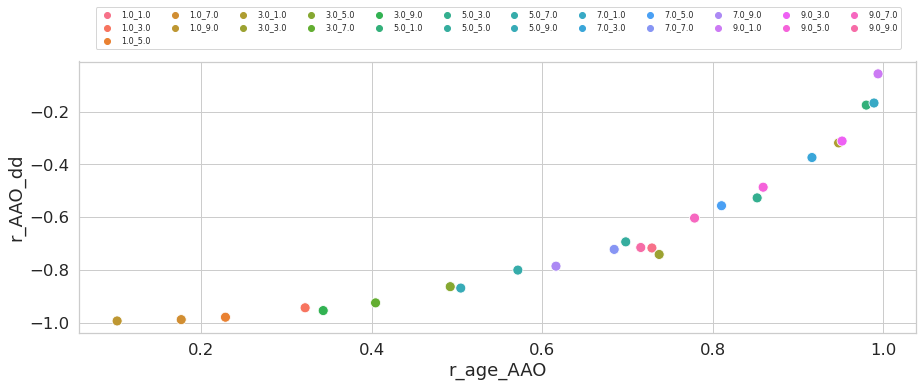

In [38]:
plot_df = corr_df.copy()
plot_df["scale_config"] = plot_df["age_scale"].astype(str) + "_" + plot_df["dd_scale"].astype(str)
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(figsize=(15, 5))
    g = sns.scatterplot(x="r_age_AAO", y="r_AAO_dd", hue="scale_config", data=plot_df, ax=axes, s=100)
    plt.legend(bbox_to_anchor=(0.02, 1.2), loc="upper left", borderaxespad=0., ncol=12, fontsize=8)

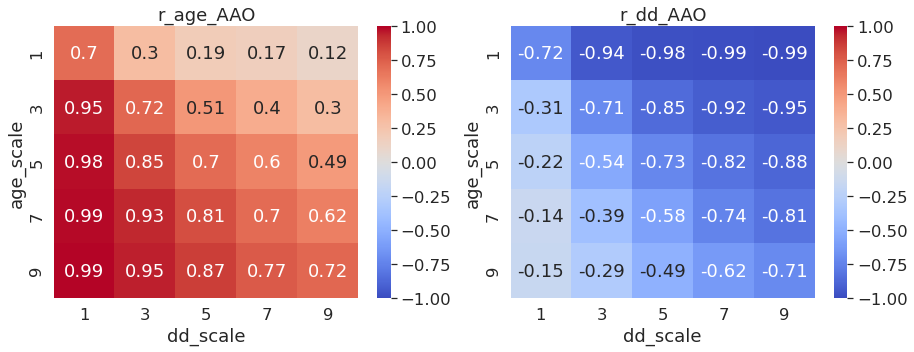

In [52]:
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(ncols=2,figsize=(15, 5))

    plot_df = r_age_AAO_df.copy().astype(float)
    ax = axes[0]
    g = sns.heatmap(plot_df, annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0, ax=ax)
    ax.set_title("r_age_AAO")
    ax.set_xlabel("dd_scale")
    ax.set_ylabel("age_scale")

    plot_df = r_AAO_dd_df.copy().astype(float)
    ax = axes[1]
    g = sns.heatmap(plot_df, annot=True, cmap="coolwarm", vmin=-1.0, vmax=1.0, ax=ax)
    ax.set_title("r_dd_AAO")
    ax.set_xlabel("dd_scale")
    ax.set_ylabel("age_scale")


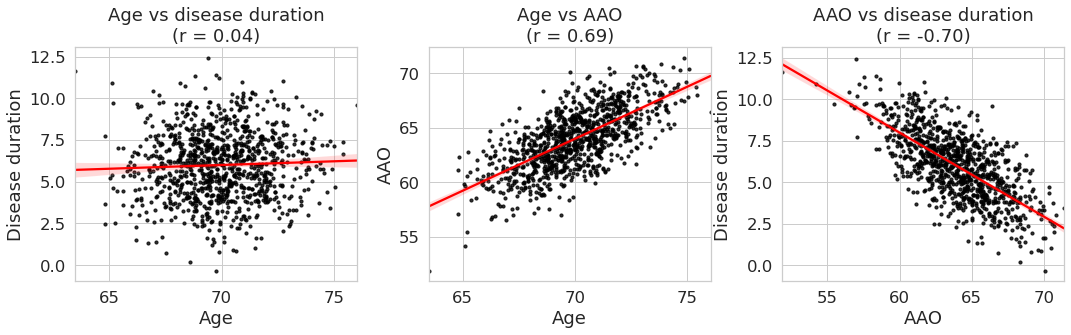

In [10]:
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax=axes[0]
    g = sns.regplot(x=age, y=dd, color="black", scatter_kws={"s": 10}, line_kws={"color": "red"}, ax=ax)
    ax.xaxis.set_label_text("Age")
    ax.yaxis.set_label_text("Disease duration")
    ax.set_title("Age vs disease duration\n(r = {:3.2f})".format(r_age_dd))
    ax=axes[1]    
    g = sns.regplot(x=age, y=AAO, color="black", scatter_kws={"s": 10}, line_kws={"color": "red"}, ax=ax)
    ax.xaxis.set_label_text("Age")
    ax.yaxis.set_label_text("AAO")
    ax.set_title("Age vs AAO\n(r = {:3.2f})".format(r_age_AAO))
    ax=axes[2]
    g = sns.regplot(x=AAO, y=dd, color="black", scatter_kws={"s": 10}, line_kws={"color": "red"}, ax=ax)
    ax.xaxis.set_label_text("AAO")
    ax.yaxis.set_label_text("Disease duration")
    ax.set_title("AAO vs disease duration\n(r = {:3.2f})".format(r_AAO_dd))
    plt.tight_layout()
   

In [89]:
participant_list = ["a","b","c","d","e"]

np.array_split(participant_list, 3)

[array(['a', 'b'], dtype='<U1'),
 array(['c', 'd'], dtype='<U1'),
 array(['e'], dtype='<U1')]

In [93]:
np.ceil(155/10)

16.0

In [94]:
np.array_split(range(155), 16)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69]),
 array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89]),
 array([90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109]),
 array([110, 111, 112, 113, 114, 115, 116, 117, 118]),
 array([119, 120, 121, 122, 123, 124, 125, 126, 127]),
 array([128, 129, 130, 131, 132, 133, 134, 135, 136]),
 array([137, 138, 139, 140, 141, 142, 143, 144, 145]),
 array([146, 147, 148, 149, 150, 151, 152, 153, 154])]